## Final Project Submission

Please fill out:
* Student name: Michael Holthouser
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:



<img src="https://res.cloudinary.com/people-matters/image/upload/fl_immutable_cache,w_624,h_351,q_auto,f_auto/v1517845732/1517845731.jpg">

# Microsoft Movie Analysis
---

### Author: Michael Holthouser

## Overview 
---
I have been tasked with helping Microsoft in their new business venture into the movie industry. I think it is important to look at not only genres and release date, but also which actors and directors were voted the most popular.  After exploring the data, it seems that audiences really prefer movies of the action, adventure, science fiction genre, which makes sense with the recent surge of super hero movies. Although actors and directors are considered a soft data point and can't be described with a hard number, they are key to attracting the avid movie goers to come watch your film. I will also provide data and visualizations to show when the best time of year to release a film, profitable genres, and popular directors and actors. This analysis will ultimately provide the components that generate successful movies.

## Business Problem 
---

Microsoft has decided that it wants create a new movie studio, but they don't know where to begin. Having no prior experience in the movie business makes it very challenging indeed. To help Microsoft start off on the right foot, I will explore what movies have the highest worldwide gross since 2010 to get a good sense of what the public tends to like. I have investigated four aspects of box office movies to help assist Microsoft in making a good decision on what kind of movie to produce: 

- Release time: What time of the year promotes the highest worldwide gross?
- Directors: Which directors are the most popular in terms of number of votes? A good director is important to attract talented actors/actresses.
- Actors: Which actors should Microsoft target for their movie?
- Genres: What genre of movies do the best in the box office in terms of worldwide gross?

## The Data
---
Firstly, here are the necessary libraries needed for analysis and visualization of the data. 

In [88]:
import sqlite3
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

### Movie Budgets - The Numbers
---
The [The Numbers](https://www.the-numbers.com/movie/budgets/all) was launched by Bruce Nash on 1997 as a free resource for industry professionals, the investment community, and movie fans to track business information on movies. The site has grown to become the largest freely-available database of movie business information on the web. The Numbers now brings information on over 50,000 movies and nearly 200,000 people to the broadest audience possible.

In [89]:
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This will be a very important and heavily used dataframe as it contains the worldwide gross, our measuring stick of success to answer the questions regarding the best time of the year to release a film, and the top worldwide grossing movie genres. 

In [90]:
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### IMDb dataset
---
The Internet Movie Database ([IMDb](https://www.imdb.com/)) is an online database containing information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals. Information on IMDb comes from a variety of sources, such as filmmakers, film studios, on-screen credits and other official sources. This database is accessed in this analysis using SQLite, so it had to be unzipped and then I performed queries to get my results. From this database, I will pull information about genres, actors, and directors. 

In [93]:
conn = sqlite3.connect('zippedData/im.db')
cur = conn.cursor()

## Data Prep: When is the best time to release a film
---

I will first start by preparing and cleaning the data from the movie budgets dataframe. 

In [94]:
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


To the question of when the best time to release a movie, I will convert the release_date column to the datetime format, create a month column. 

In [95]:
df_movie_budgets['release_date'] = pd.to_datetime(df_movie_budgets['release_date'])
print(type(df_movie_budgets.release_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [96]:
df_movie_budgets['release_month'] = pd.DatetimeIndex(df_movie_budgets['release_date'])
df_movie_budgets['release_month'] = df_movie_budgets['release_date'].dt.strftime('%B')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December


Since I am analyzing recent data from the year 2010, I am going to extract the year from the release_date column and create a new column called release_year.

In [97]:
df_movie_budgets['release_year'] = pd.DatetimeIndex(df_movie_budgets['release_date']).year
recent_movie_budgets = df_movie_budgets.query("release_year >= 2010")
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",May,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",June,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",December,2015


In [98]:
recent_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2194 entries, 1 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2194 non-null   int64         
 1   release_date       2194 non-null   datetime64[ns]
 2   movie              2194 non-null   object        
 3   production_budget  2194 non-null   object        
 4   domestic_gross     2194 non-null   object        
 5   worldwide_gross    2194 non-null   object        
 6   release_month      2194 non-null   object        
 7   release_year       2194 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 154.3+ KB


Because mathmatical operations cannot be operated on strings, the columns production_budget, domestic_budget, and worldwide_budget must be formatted to the float data type as well as the "$" and "," removed. 

In [99]:
recent_movie_budgets['production_budget'] = recent_movie_budgets['production_budget'].map(lambda x: float(x[1:].replace(',', '')))
recent_movie_budgets['domestic_gross'] = recent_movie_budgets['domestic_gross'].map(lambda x: float(x[1:].replace(',', '')))
recent_movie_budgets['worldwide_gross'] = recent_movie_budgets['worldwide_gross'].map(lambda x: float(x[1:].replace(',', '')))

In [100]:
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,December,2017
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,December,2015


Next, I will total worldwide_gross and group by the month to see since 2010, which month has the highest worldwide gross. 

In [101]:
top_gross_month = recent_movie_budgets.groupby(recent_movie_budgets['release_month'])\
                  ['worldwide_gross'].sum().sort_values(ascending=False)
top_gross_month

release_month
November    30219577526.00
June        29100685868.00
December    28846646144.00
May         28720641300.00
July        27597983128.00
March       21431004817.00
February    16237022264.00
April       16103292981.00
October     13429906560.00
August      13275109875.00
September   11179686398.00
January      9352469654.00
Name: worldwide_gross, dtype: float64

Next, I will use a barplot to visualize the data obtained to get a better look of what months have the highest worldwide gross.  

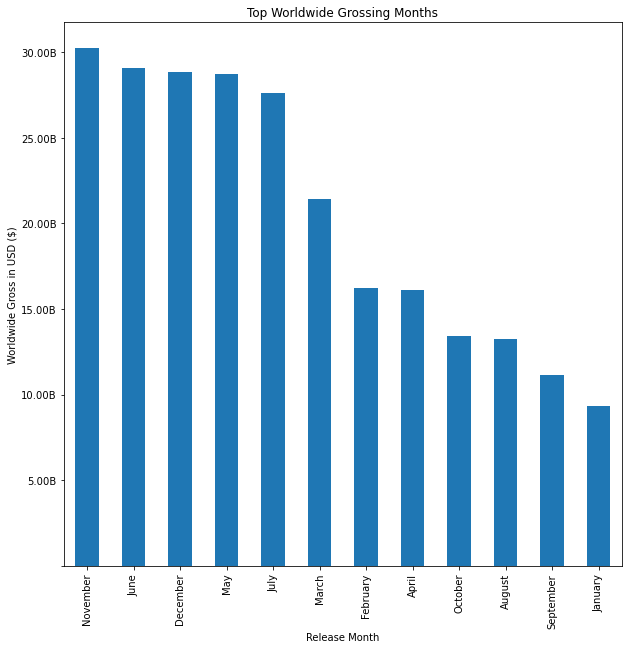

In [132]:
ax=top_gross_month.plot.bar(x='release_month', y='worldwide_gross', figsize=(10,10))

ax.set(ylabel = 'Worldwide Gross in USD ($)', xlabel = 'Release Month')
ax.set_title('Top Worldwide Grossing Months')
def format_num(data_value,indx):
    """
    This function formats graphs by adding B to billions, M to milliions,
    and K to thousands
    """

    if data_value >= 1_000_000_000:
        formatter = '{:1.2f}B'.format(data_value*.000000001)
        return formatter
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
        return formatter
    elif data_value >= 1_000:
        formatter = '{:1.0f}K'.format(data_value*.001)
        return formatter
    else:
        formatter=None

ax.yaxis.set_major_formatter(format_num)

It appears that the top worldwide grossing month to release a film since 2010 is in the month of November. My intial thoughts before I began the analysis, was that the best month to release a film was going to be around Christmas time. But after more analysis, it appears that the summer time is just as profitable as the Christmas holidays. June, December, and May come in fairly even with each other. The worst month to release a film is clearly in the month of January, so don't release a movie during the new year. 

### Data Prep: Which directors are the most popular in terms of number of votes
---

This data was contained in a SQLite database obtained from the [IMDb](https://www.imdb.com/) website. I used number of votes as the measurement for popularity because average rating was not an accurate measuring stick. In my original findings, some directors could have a 10 average rating, but not have any votes, meaning they have not filmed many movies. The more votes a director had gotten means their movies have gotten more worldwide exposure and attention. 
I filtered for number of votes to be higher than 100,000 to limit the scope of the data, and to only provide the most popular directors for analysis. 

This is a query to create a pandas table dataframe called directors. 

In [103]:
directors = pd.read_sql("""
SELECT primary_title AS title, genres, primary_name AS name, category, averagerating AS average_rating, numvotes AS number_of_votes
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
JOIN directors
    USING(movie_id)
JOIN persons
    USING(person_id)
WHERE category like 'director'
and start_year >= 2010
and number_of_votes >100000
GROUP BY title, name
ORDER BY numvotes DESC;

""", conn)

In [144]:
directors.head()

,title,genres,name,category,average_rating,number_of_votes
0,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,director,8.80,1841066
1,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,director,8.40,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,director,8.60,1299334
3,Django Unchained,"Drama,Western",Quentin Tarantino,director,8.40,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",Joss Whedon,director,8.10,1183655


The next line of code is to see how many unique names there are in the new dataframe created from the SQL database.

In [104]:
director_names = list(directors['name'].unique())
len(director_names)


401

In [105]:
directors.loc[directors.name == 'Christopher Nolan'].number_of_votes.sum()

4994749

With there being 401 unique director names in the compiled list, I will create a list of dictionaries with the director's name as the key, and perform a loop to get directors that only have 1,600,000 votes or more to narrow the list the directors to just the most popular. 

In [106]:
director_map = {}
for name in director_names: 
    number_of_votes = directors.loc[directors.name == name].number_of_votes.sum()
    if number_of_votes >= 1600000:
        director_map[name]=number_of_votes    
director_map
    

{'Christopher Nolan': 4994749,
 'Quentin Tarantino': 1646371,
 'Joss Whedon': 1849249,
 'Martin Scorsese': 2326187,
 'David Fincher': 1717750,
 'Peter Jackson': 1723813,
 'David Yates': 1796023,
 'Ridley Scott': 1836094,
 'Anthony Russo': 2361820,
 'Joe Russo': 2361820,
 'Zack Snyder': 1771703,
 'Matthew Vaughn': 1881600,
 'Denis Villeneuve': 2013951}

After filtering our list of director names, we have narrowed down our list from 401 down to 13 directors. Below is a list of the 13 directors with their associated movies, and the total number of votes that each movie had gotten. 

In [134]:
filtered_directors = directors[(directors.name == 'Christopher Nolan') | (directors.name == 'Quentin Tarantino')|\
                              (directors.name =='Joss Whedon') | (directors.name =='Martin Scorsese')\
                               | (directors.name =='David Fincher') | (directors.name =='Peter Jackson')|\
                              (directors.name =='David Yates') | (directors.name =='Ridley Scott') |\
                               (directors.name =='Anthony Russo') | (directors.name =='Joe Russo') |\
                               (directors.name =='Zach Snyder')| (directors.name =='Matthew Vaughn')\
                               | (directors.name =='Denis Villeneuve')] 
                                
filtered_directors

,title,genres,name,category,average_rating,number_of_votes
0,Inception,"Action,Adventure,Sci-Fi",Christopher Nolan,director,8.80,1841066
1,The Dark Knight Rises,"Action,Thriller",Christopher Nolan,director,8.40,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",Christopher Nolan,director,8.60,1299334
3,Django Unchained,"Drama,Western",Quentin Tarantino,director,8.40,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",Joss Whedon,director,8.10,1183655
5,The Wolf of Wall Street,"Biography,Crime,Drama",Martin Scorsese,director,8.20,1035358
6,Shutter Island,"Mystery,Thriller",Martin Scorsese,director,8.10,1005960
12,Gone Girl,"Drama,Mystery,Thriller",David Fincher,director,8.10,761592
13,The Hobbit: An Unexpected Journey,"Adventure,Family,Fantasy",Peter Jackson,director,7.90,719629
16,Harry Potter and the Deathly Hallows: Part 2,"Adventure,Drama,Fantasy",David Yates,director,8.10,691835


Now I will visualize the filtered_directors dataframe. It is no surprise that Christopher Nolan has the most votes. He has three movies at the top of the list with the most votes.  

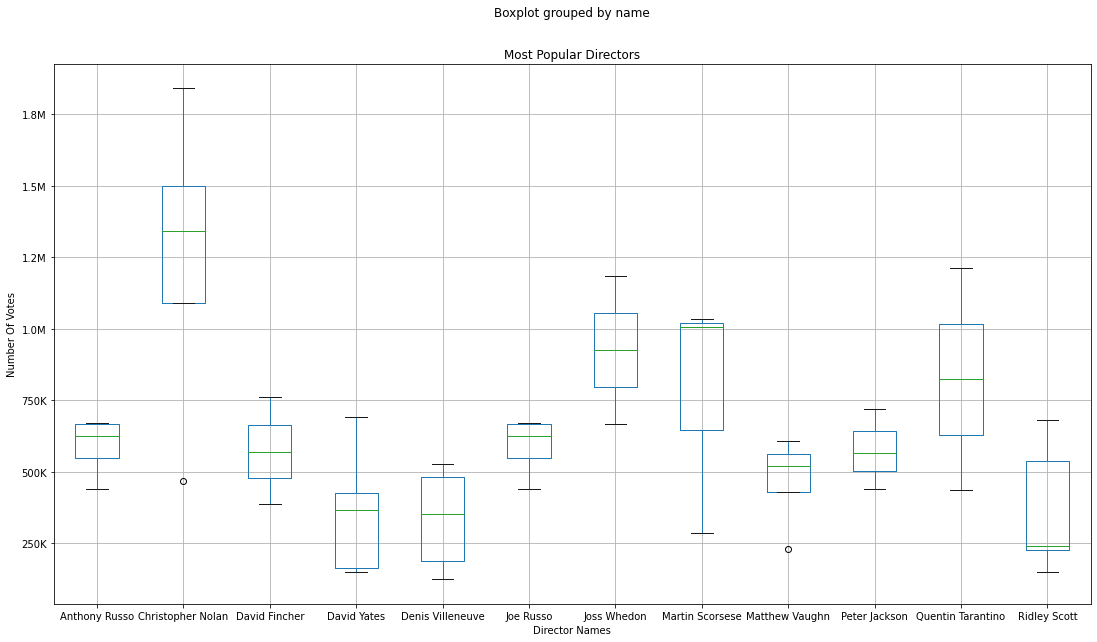

In [150]:
ax1 = filtered_directors.boxplot(column='number_of_votes', by='name', figsize=(18,10)) 
ax1.set(ylabel = 'Number Of Votes', xlabel = 'Director Names')
ax1.set_title('Most Popular Directors')
ax1.yaxis.set_major_formatter(format_num);

### Data Prep: Which actors are the most popular in terms of number of votes
---

Next we will look at which actors to consider when hiring for your new movie production company. Since I am interested in the same column data as the director dataframe, I will use the same query on the IMDb database. Except this time filtering for actor names and not director names. 

In [109]:
actors = pd.read_sql("""
SELECT primary_title AS title, primary_name AS name, category, numvotes AS number_of_votes
FROM movie_ratings
JOIN movie_basics
    USING(movie_id)
JOIN principals
    USING(movie_id)
JOIN persons
    USING(person_id)
WHERE category like 'actor'
and start_year >= 2010
and number_of_votes >100000
GROUP BY title, name
ORDER BY numvotes DESC;

""", conn)

In the query, we filtered for actors in films from the year 2010 and later, and that have gotten more than one million votes to get a list of the most popular actors. 

In [146]:
actor_names = list(actors['name'].unique())
len(actor_names)

724

After performing the SQL query for popular actors, we came up with a list of 724 unique actor names that have gotten over one million votes.  This is a very large list of names, so I will continue to filter the list even more to get a smaller list to better visualize the results. 

In [111]:
actor_map = {}
for name in actor_names: 
    number_of_votes = actors.loc[actors.name == name].number_of_votes.sum()
    if number_of_votes >= 3500000:
        actor_map[name]=number_of_votes    
actor_map
    

{'Joseph Gordon-Levitt': 3561995,
 'Leonardo DiCaprio': 6264072,
 'Tom Hardy': 4883807,
 'Matthew McConaughey': 3543051,
 'Chris Evans': 5118470,
 'Robert Downey Jr.': 6355537,
 'Mark Ruffalo': 4777589,
 'Bradley Cooper': 4414885,
 'Chris Hemsworth': 4584358}

In [147]:
filtered_actors = actors[(actors.name == 'Joseph Gordon-Levitt') | (actors.name == 'Leonardo DiCaprio') | \
                  (actors.name == 'Tom Hardy')| (actors.name == 'Matthew McConaughey') | (actors.name == 'Chris Evans')\
                  | (actors.name == 'Robert Downey Jr.') | (actors.name == 'Mark Ruffalo') | (actors.name == 'Bradley Cooper')\
                  | (actors.name == 'Chris Hemsworth')]
filtered_actors

,title,name,category,number_of_votes
0,Inception,Joseph Gordon-Levitt,actor,1841066
2,Inception,Leonardo DiCaprio,actor,1841066
5,The Dark Knight Rises,Tom Hardy,actor,1387769
6,Interstellar,Matthew McConaughey,actor,1299334
9,Django Unchained,Leonardo DiCaprio,actor,1211405
...,...,...,...,...
1486,The Walk,Joseph Gordon-Levitt,actor,109714
1498,In the Heart of the Sea,Chris Hemsworth,actor,108628
1513,The Dark Tower,Matthew McConaughey,actor,107518
1545,Kubo and the Two Strings,Matthew McConaughey,actor,105578


In the boxplot, we have narrowed down the list of actors to nine total by only accepting actors that have gotten at least 3.5 million votes. From our list, we can see that Leonardo DiCaprio has gotten the most votes. Although, Joseph Gordon-Levitt is tied with DiCaprio for the highest number of votes for a movie with 1,841,066 votes, this is because they both starred in the same movie, Inception. 

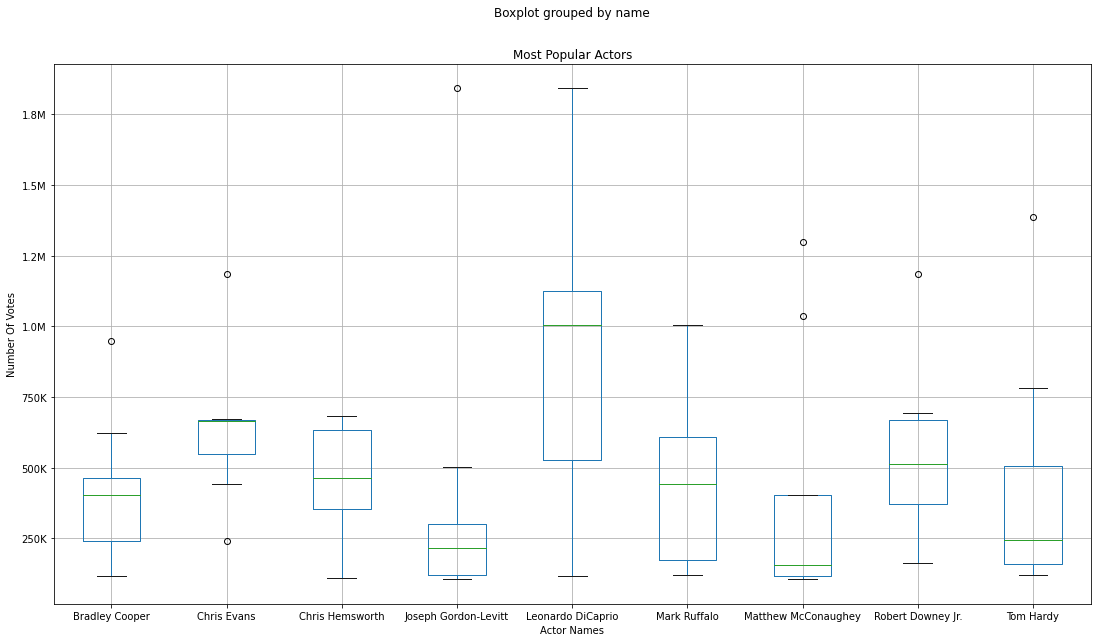

In [149]:
ax2 = filtered_actors.boxplot(column='number_of_votes', by='name', figsize=(18,10)) 
ax2.set(ylabel = 'Number Of Votes', xlabel = 'Actor Names')
ax2.set_title('Most Popular Actors')
ax2.yaxis.set_major_formatter(format_num);

### Data Prep: What genres did the best in the box office in terms of worldwide gross
---

In the cells below, we are creating a query to find movies from 2010 and later with their associated genres. With those queries, a dataframe will be created to be able to loop it with the recent_movie_budgets dataframe to be able to add the genres to it's associated movie title. 
The first query is making a list of unique movie titles from the database populated by the SQL query. 

In [114]:
genres = list(pd.read_sql("""
SELECT primary_title AS title, genres AS genre, start_year AS release_year
FROM movie_basics
WHERE start_year >= 2010;
""", conn).title.unique())

In [115]:
df_genres = pd.read_sql("""
SELECT primary_title AS title, genres AS genre, start_year AS release_year
FROM movie_basics
WHERE start_year >= 2010;
""", conn)

In this cell we are creating a counter to sum up how many movies in the recent_movie_budgets dataframe I could add a genre too. In other words, we want to make sure the list of movies from the SQL database exist in the CSV database. 

In [116]:
count = 0
for genre in genres:
    if genre in list(recent_movie_budgets.movie.unique()):
        count += 1


There will a total of 1,798 movie in the recent_movie_budgets list that could have a corresponding genre. That leaves about 400 total movie titles, that will have a genre of "no category" in the dataframe

In [117]:
count

1798

In [118]:
len(recent_movie_budgets.movie.unique())

2190

This cell shows that for the movies in the recent_movie_budgets dataframe, the movie titles that will not have a genre associated with them will have instead a string that says 'no category'. 

In [119]:
genre_list = []
##Loop through titles to match with genres dataframe
for title in list(recent_movie_budgets.movie):
    ##This is where we will check if the title is in the genres dataframe
    if title in genres:
        genre_list.append(df_genres.loc[df_genres.title == title].genre)
    else:
        genre_list.append('no category')

This cell resets the index, so the output is formatted to only show the movie genres.  

In [120]:
genre_list = [x if type(x) == str else x.reset_index(drop=True)[0] for x in genre_list]

In [121]:
genre_list

['Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'no category',
 'no category',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Thriller',
 'Action,Thriller',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Western',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Fantasy',
 'Adventure,Family,Fantasy',
 'Adventure,Fantasy',
 'Adventure,Fantasy',
 'Action,Crime,Thriller',
 'Action,Adventure,Fantasy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Comedy',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Drama',
 'Action,Adventure,Sci-Fi',
 'Action,Adventure,Animation',
 'Action,Adventure,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'no category',
 'Adventure,Family,Fantasy',
 

Next, a new column called 'genre' is created where we will fill in the associated movie titles genres that were obtained from the SQL query. 

In [122]:
recent_movie_budgets['genre'] = genre_list
recent_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,"Action,Adventure,Fantasy"
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,June,2019,"Action,Adventure,Sci-Fi"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015,"Action,Adventure,Sci-Fi"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,December,2017,no category
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,December,2015,no category


This line of code was just out of curiosity, to see how many movie genres we had in our list. 

In [123]:
recent_movie_budgets['genre'].nunique()

261

This is where the final dataframe is being created. I have filtered the woldwide_gross to be at least one billion dollars, and to exclude any movie titles that had 'no category' in the genre field. 

In [131]:
recent_movie_budgets = recent_movie_budgets.loc[(recent_movie_budgets['genre']!='no category') & \
                                               (recent_movie_budgets['worldwide_gross'] >= 1000000000)]
recent_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,release_year,genre
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,May,2011,"Action,Adventure,Fantasy"
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,May,2015,"Action,Adventure,Sci-Fi"
6,7,2018-04-27,Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,April,2018,"Action,Adventure,Sci-Fi"
10,11,2012-07-20,The Dark Knight Rises,275000000.00,448139099.00,1084439099.00,July,2012,"Action,Thriller"
16,17,2016-05-06,Captain America: Civil War,250000000.00,408084349.00,1140069413.00,May,2016,"Action,Adventure,Sci-Fi"
18,19,2012-12-14,The Hobbit: An Unexpected Journey,250000000.00,303003568.00,1017003568.00,December,2012,"Adventure,Family,Fantasy"
22,23,2017-04-14,The Fate of the Furious,250000000.00,225764765.00,1234846267.00,April,2017,"Action,Crime,Thriller"
26,27,2012-05-04,The Avengers,225000000.00,623279547.00,1517935897.00,May,2012,"Action,Adventure,Sci-Fi"
33,34,2015-06-12,Jurassic World,215000000.00,652270625.00,1648854864.00,June,2015,"Action,Adventure,Sci-Fi"
36,37,2014-06-27,Transformers: Age of Extinction,210000000.00,245439076.00,1104039076.00,June,2014,"Action,Adventure,Sci-Fi"


Next, from the recent_movie_budgets dataframe a dictionary called genre_map was created with it's contents comprised of a unique genres with the sum of their worldwide gross. 

In [ ]:
genre_list[0].reset_index(drop=True)[0]

The cell above was used to format the genres to just have the genre with it's corresponding total worldwide_gross.

In [129]:
genre_map = {}
for genres in list(recent_movie_budgets.genre.unique()): 
    worldwide_gross = recent_movie_budgets.loc[recent_movie_budgets.genre == genres].worldwide_gross.sum()
    genre_map[genres]=worldwide_gross    
genre_map

{'Action,Adventure,Fantasy': 2192558515.0,
 'Action,Adventure,Sci-Fi': 16027425657.0,
 'Action,Thriller': 1084439099.0,
 'Adventure,Family,Fantasy': 2042494678.0,
 'Action,Crime,Thriller': 2753569061.0,
 'Action,Adventure,Animation': 1242520711.0,
 'Adventure,Animation,Comedy': 5304588254.0,
 'Action,Adventure,Thriller': 1110526981.0,
 'Drama,Fantasy,Romance': 1259199706.0,
 'Adventure,Drama,Sport': 1272469910.0}

To get a better grasp of the genre_map data, I created a visualization showing the top worldwide grossing movie genres since 2010. 

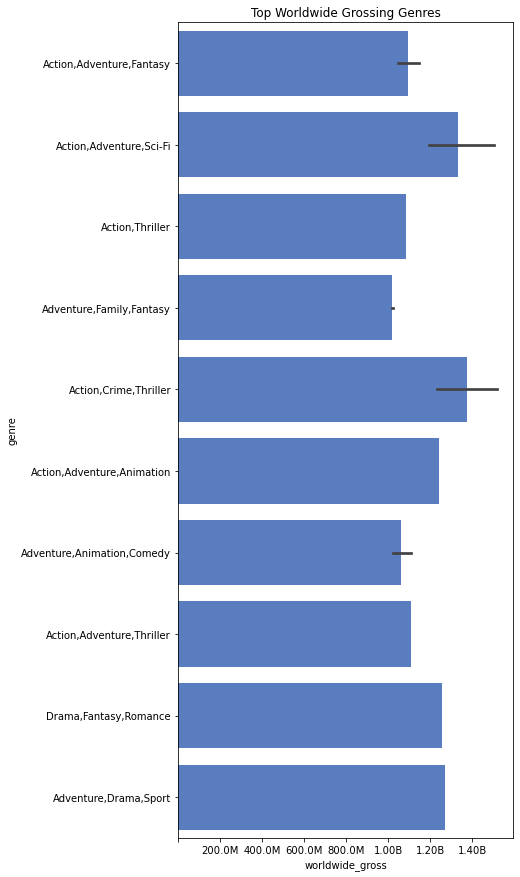

In [143]:
f, ax = plt.subplots(figsize=(6, 15))
ax.xaxis.set_major_formatter(format_num);
ax.set_title('Top Worldwide Grossing Genres')
sns.set_color_codes("muted")
sns.barplot(x="worldwide_gross", y="genre", data=recent_movie_budgets,
            label="Popular Genres", color="b");

Since, 2010 it appears that action, adventure is the top worldwide grossing movie genre with action/crime/thriller as close second. 

## Conclusion
---
In conclusion, I would recommend that Microsoft create movies of either the action/adventure/sci-fi genre or the action/crime/thriller genre. From the data provided, hiring well known directors and actors is proven to positively impact the worldwide gross for a film. To promote the highest box office sales, I recommend a release date during the summer season or during the holidays in November and December. 
Movie genre, the hiring of a director and lead actor, and release month are all factors critical to creating a successul film. 